# **Model Testing** - Reviewing Topics Only

**All Features:**

Contains only the topics for testing the models

List of the models to test and the parameters to tune:
  
**Models:**
- Naive Bayes
- Logistic Regression
- Random Forest
- SVM

**Evaluations:**
- Accuracy, precision, recall, f1
- Confusion Matrix
- ROC/AUC

**Class Imbalance Issues:**
- Run a model on just one topic with good class distribution:
- Undersampling
- Use top 10 words for each PassH as features


- try running models with only words
- ADD top five pass, top five not pass


- try one without 112th
    

# **Query Data**

In [163]:
import mysql.connector 
import numpy as np
import pandas as pd
import config_final
import requests

from sodapy import Socrata
import sqlalchemy as db

import config_final as config
from schema import DbSchema



In [164]:
bills_db = DbSchema(config)

# topics_db = bills_db.query('SELECT * from topics')

In [165]:
# Full dataframe for running models

df = bills_db.query("""
    SELECT
        cb.PassH,
        tp.dominant_topic         
    FROM 
        con_bills.current_bills as cb
    JOIN
        con_bills.topics as tp
    ON cb.BillID = tp.BillID
    WHERE cb.Cong >= 110""")


In [166]:
df.head()

,PassH,dominant_topic
0,1,5
1,0,10
2,0,4
3,0,10
4,0,5


In [167]:
df.groupby(['dominant_topic', 'PassH']).size()

dominant_topic  PassH
0               0        5172
                1         372
1               0        2992
                1         188
2               0        2124
                1         226
3               0        2901
                1         103
4               0        3309
                1         221
5               0        3665
                1         326
6               0        5171
                1          95
7               0        4723
                1        1445
8               0        3752
                1         210
9               0        3280
                1         213
10              0        2378
                1          74
11              0        4099
                1         396
12              0        3476
                1         156
dtype: int64

# **Train and Test**

In [168]:
from sklearn.model_selection import train_test_split

X = df[['dominant_topic']]
y = df['PassH']


# **Modeling**

Import packages:

- CountVectorizer
- TFIDF

- Naive Bayes
- Logistic Regression
- Random Forest

**Remember to look at feature importances!

In [169]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import FeatureHasher

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# We will train our classifier with the following features:

# We create the preprocessing pipelines for all data types.


**Train test split**

In [170]:
#Train Test split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1)

Chi-square

**Naive Bayes**

In [171]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# nb = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')),
#                       ('classifier', MultinomialNB())]) #get parameters
parameters = None

nb = MultinomialNB()

nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, nb_y_pred))
print(classification_report(y_test, nb_y_pred))

nb_confusion_matrix = (confusion_matrix(y_test, nb_y_pred))

[[9388    0]
 [ 826    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9388
           1       0.00      0.00      0.00       826

    accuracy                           0.92     10214
   macro avg       0.46      0.50      0.48     10214
weighted avg       0.84      0.92      0.88     10214



/Users/melissamunz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

- Precision means the percentage of your results which are relevant. 
- recall refers to the percentage of total relevant results correctly classified by your algorithm.

Also make a precision recall curve

In [173]:
from sklearn.linear_model import LogisticRegression


# Bring in OHE?

# lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', LogisticRegression(class_weight='balanced'))]) #get parameters

# Logistic Regression Classifier
lr_clf = LogisticRegression(class_weight='balanced')

lr_clf.fit(X_train, y_train)

lr_y_pred = lr_clf.predict(X_test)

print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

[[5032 4356]
 [ 327  499]]
              precision    recall  f1-score   support

           0       0.94      0.54      0.68      9388
           1       0.10      0.60      0.18       826

    accuracy                           0.54     10214
   macro avg       0.52      0.57      0.43     10214
weighted avg       0.87      0.54      0.64     10214



Text(0.5, 1, 'Confusion Matrix')

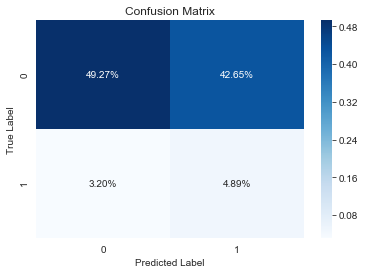

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

#shows percent data represented in each quadrant

sns.heatmap(lr_confusion_matrix/np.sum(lr_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [70]:
#for ROC/AUC Curve

lr_dec = lr_clf.decision_function(X_test)

import numpy as np
from sklearn.metrics import roc_auc_score
lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_roc_auc

#This is a decent ROC Score. Remember lays between .5 and 1

0.5700598156835113

Test AUC: 0.49500508608692145


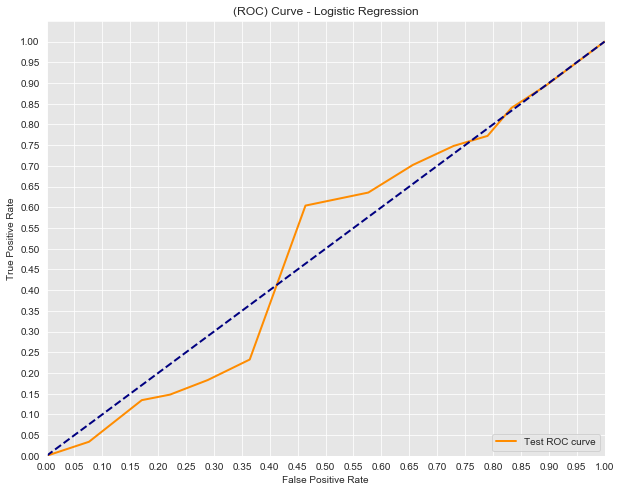

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, lr_dec)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [72]:
from sklearn.metrics import average_precision_score

lr_average_precision = average_precision_score(y_test, lr_dec)

print('Average precision-recall score: {0:0.2f}'.format(
      lr_average_precision))

Average precision-recall score: 0.08


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.08')

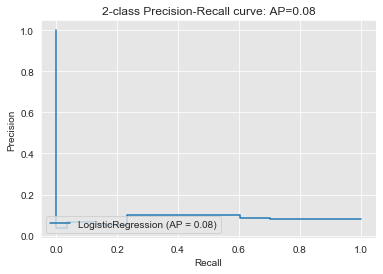

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lr_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(lr_average_precision))

Evaluate:
- ROC/AUC

**Random Forest**

Class Imbalance: To overcome this issue, we used repeated random sub-sampling. Initially, we construct the testing data and the NoS training data sub-samples. For each disease, we train NoS classifiers and test all of them on the same data set. The final labels of the testing data are computed using a majority voting scheme.

In [175]:
from sklearn.ensemble import RandomForestClassifier

#add bag of trees?
#add OHE

rf = RandomForestClassifier(max_depth=None, max_features='auto', n_estimators=10, class_weight="balanced")

rf_clf =rf.fit(X_train, y_train) 

rf_y_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

[[6410 2978]
 [ 325  501]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.80      9388
           1       0.14      0.61      0.23       826

    accuracy                           0.68     10214
   macro avg       0.55      0.64      0.51     10214
weighted avg       0.89      0.68      0.75     10214



Text(0.5, 1, 'Confusion Matrix')

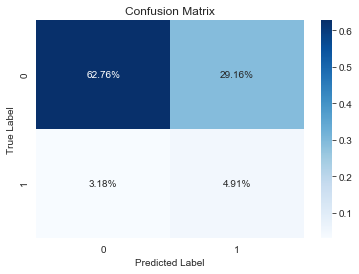

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

#shows percent data represented in each quadrant

sns.heatmap(rf_confusion_matrix/np.sum(rf_confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')